In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [2]:
def gradient_descent(X_train, y_train, X_val, y_val, lr=0.01, epochs=100):
    """
    shapes:
        X_train = nxm
        y_train = nx1
        X_val = pxm
        y_test = px1
        W = mx1
    """
    n = X_train.shape[0]
    m = X_train.shape[1]
    
    o = X_val.shape[0]

    # Poner columna de unos a las matrices X
    X_train = np.hstack((np.ones((n, 1)), X_train))
    X_val = np.hstack((np.ones((o, 1)), X_val))
    

    # Inicializar pesos aleatorios
    W = np.random.randn(m+1).reshape(m+1, 1)

    train_errors = []  # Para almacenar el error de entrenamiento en cada época
    test_errors = []   # Para almacenar el error de prueba en cada época

    for _ in range(epochs):
        # Calcular predicción y error de entrenamiento
        prediction_train = np.matmul(X_train, W) 
        error_train = y_train - prediction_train  
        #print(error_train)
        train_mse = np.mean(error_train ** 2)
        train_errors.append(train_mse)

        # Calcular predicción y error de prueba
        prediction_test = np.matmul(X_val, W) 
        error_test = y_val - prediction_test 
        test_mse = np.mean(error_test ** 2)
        test_errors.append(test_mse)

        # Calcular el gradiente y actualizar pesos
        grad_sum = np.sum(error_train * X_train, axis=0)
        grad_mul = -2/n * grad_sum  # 1xm
        gradient = np.transpose(grad_mul).reshape(-1, 1)  # mx1

        W = W - (lr * gradient)

    # Graficar errores de entrenamiento y prueba
    # Definir una figura
    plt.figure(figsize=(12, 6))
    # Plotear errores de entrenamiento
    plt.plot(train_errors, label='Error de entrenamiento')
    # Plotear errores de prueba
    plt.plot(test_errors, label='Error de validación')
    # Poner labels en los ejes
    plt.xlabel('Época')
    plt.ylabel('Error cuadrático medio')
    # Activar la leyenda
    plt.legend()
    # Poner titulo
    plt.title('Error de entrenamiento y validación vs iteraciones (GD)')
    # Terminar y mostrar gráfico
    plt.show()

    return W

In [32]:
def stochastic_gradient_descent(X_train, y_train, X_test, y_test, lr=0.01, epochs=100):

    n = X_train.shape[0]
    m = X_train.shape[1]

    X_train = np.hstack((np.ones((n, 1)), X_train))
    X_test = np.hstack((np.ones((X_test.shape[0], 1)), X_test))

    W = np.random.randn(m + 1).reshape(-1, 1)

    train_errors = []
    test_errors = []

    for i in range(epochs):
        # Permutación aleatoria de los datos
        permutation = np.random.permutation(n)
        X_train = X_train[permutation]
        y_train = y_train[permutation]

        for j in range(n):
            # Obtener una muestra aleatoria de un solo dato para hacer SGD
            x_sample = X_train[j]
            y_sample = y_train[j][0]

            prediction = np.matmul(x_sample, W)
            error = y_sample - prediction
            train_mse = error ** 2
            train_errors.append(train_mse)

            prediction_test = np.matmul(X_test, W)
            error_test = y_test - prediction_test
            test_mse = np.mean(error_test ** 2)
            test_errors.append(test_mse)

            gradient = -2 * error * x_sample.T.reshape(-1, 1)

            W = W - (lr * gradient)

            

    plt.figure(figsize=(12, 6))
    plt.plot(train_errors, label='Error de entrenamiento')
    plt.plot(test_errors, label='Error de prueba')
    plt.xlabel('Iteración')
    plt.ylabel('Error cuadrático medio')
    plt.legend()
    plt.title('Error de entrenamiento y prueba vs iteraciones (SGD)')
    plt.show()

    return W

In [38]:
def mini_batch_gradient_descent(X_train, y_train, X_test, y_test, lr=0.01, epochs=100, batch_size=11):
    n = X_train.shape[0]
    m = X_train.shape[1]

    X_train = np.hstack((np.ones((n, 1)), X_train))
    X_test = np.hstack((np.ones((X_test.shape[0], 1)), X_test))

    W = np.random.randn(m + 1).reshape(-1, 1)

    train_errors = []
    test_errors = []

    for i in range(epochs):
        
        # Permutación aleatoria de los datos
        permutation = np.random.permutation(n)
        X_train = X_train[permutation]
        y_train = y_train[permutation]


        for j in range(0, n, batch_size):
            # Obtener un lote (mini-batch) de datos
            x_batch = X_train[j:j+batch_size, :]
            y_batch = y_train[j:j+batch_size].reshape(-1, 1)

            prediction = np.matmul(x_batch, W)
            error = y_batch - prediction
            train_mse = np.mean(error ** 2)
            train_errors.append(train_mse)

            gradient = -2 * np.matmul(x_batch.T, error) / batch_size

            W = W - (lr * gradient)

            prediction_test = np.matmul(X_test, W)
            error_test = y_test - prediction_test
            test_mse = np.mean(error_test ** 2)
            test_errors.append(test_mse)

    plt.figure(figsize=(12, 6))
    plt.plot(train_errors, label='Error de entrenamiento')
    plt.plot(test_errors, label='Error de prueba')
    plt.xlabel('Iteración')
    plt.ylabel('Error cuadrático medio')
    plt.legend()
    plt.title('Error de entrenamiento y prueba vs iteraciones (Mini-Batch GD)')
    plt.show()

    return W

In [3]:
income = pd.read_csv('data/happyscore_income.csv')

In [4]:
X_train, X_test, y_train, y_test = train_test_split(income['GDP'], income['happyScore'], test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.125, random_state=42)

In [5]:
X_train.shape, X_val.shape, X_test.shape

((77,), (11,), (23,))

In [11]:
X_train.values.reshape(11,7)

array([[0.92049, 0.63216, 0.89012, 0.99355, 0.73479, 0.25812, 0.271  ],
       [1.08254, 1.20813, 1.12254, 1.13764, 1.39651, 1.32548, 1.01216],
       [0.7419 , 1.03192, 1.33723, 0.33024, 1.25114, 0.76454, 1.39451],
       [0.46038, 0.75985, 1.06098, 0.22208, 0.9669 , 0.19073, 1.06024],
       [1.05351, 0.82827, 0.80148, 0.89537, 1.30782, 1.0088 , 1.11312],
       [1.17898, 1.33171, 0.75778, 1.33596, 0.0712 , 0.98124, 0.59543],
       [0.2852 , 0.88113, 0.39753, 0.64499, 1.18498, 0.36471, 1.02389],
       [0.47428, 0.0694 , 0.54558, 0.79907, 0.36498, 1.27074, 1.04345],
       [1.30232, 1.32792, 1.06166, 0.83524, 0.37545, 0.39047, 1.459  ],
       [0.4225 , 0.95578, 1.56391, 0.21102, 1.23011, 0.82819, 1.14723],
       [0.92053, 1.12486, 1.32629, 0.59325, 0.91861, 0.59532, 1.12555]])

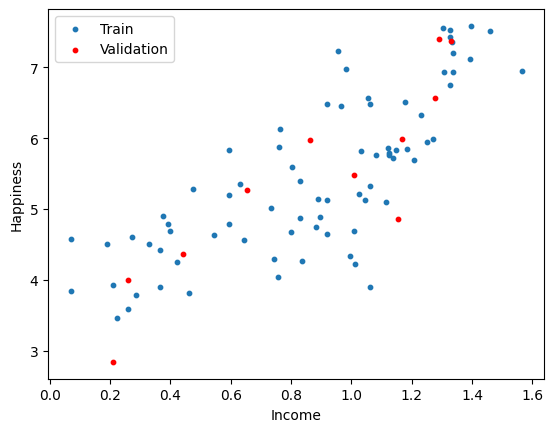

In [6]:
fig, ax = plt.subplots()
ax.scatter(X_train.values, y_train, s=10)
ax.scatter(X_val.values, y_val, s=10, color='red')

ax.set_xlabel('Income')
ax.set_ylabel('Happiness')
ax.legend(['Train', 'Validation'])
plt.show()

In [12]:
X_train= X_train.values.reshape(-1, 1)
y_train= y_train.values.reshape(-1, 1)
X_val= X_val.values.reshape(-1, 1)
y_val= y_val.values.reshape(-1, 1)
X_test= X_test.values.reshape(-1, 1)
y_test= y_test.values.reshape(-1, 1)

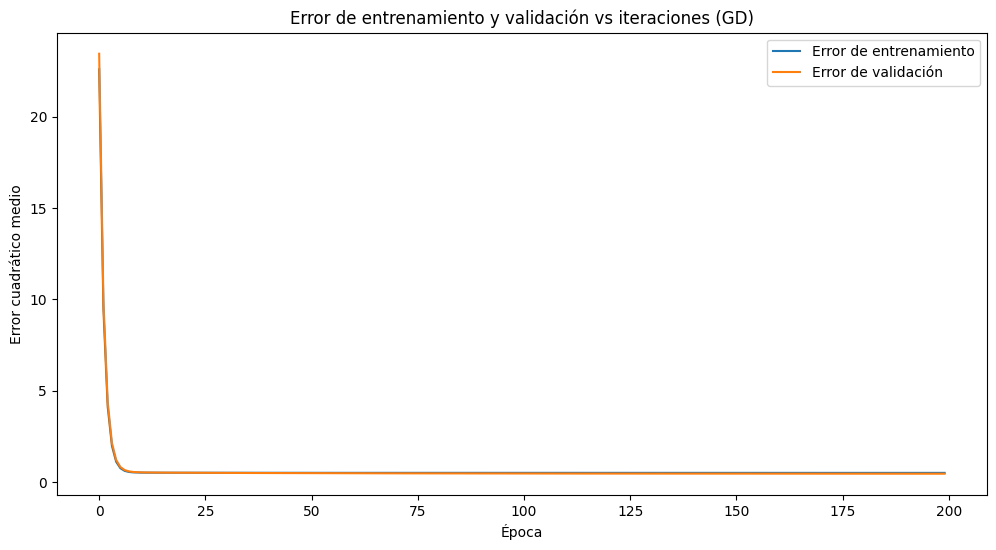

array([[3.45318571],
       [2.30150281]])

In [31]:
gradient_descent(X_train, y_train, X_val, y_val, lr=0.1, epochs=200)

c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:118: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\Users\DELL\AppData\Local\Temp\ipykernel_22948\2644828452.py:27: RuntimeWarning: overflow encountered in square
  train_mse = error ** 2
C:\Users\DELL\AppData\Local\Temp\ipykernel_22948\2644828452.py:32: RuntimeWarning: overflow encountered in square
  test_mse = np.mean(error_test ** 2)
C:\Users\DELL\AppData\Local\Temp\ipykernel_22948\2644828452.py:30: RuntimeWarning: overflow encountered in matmul
  prediction_test = np.matmul(X_test, W)
C:\Users\DELL\AppData\Local\Temp\ipykernel_22948\2644828452.py:35: RuntimeWarning: overflow encountered in multiply
  gradient = -2 * error * x_sample.T.reshape(-1, 1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_22948\2644828452.py:37: RuntimeWarning: invalid value encountered in subtract
  W = W - (lr * gradient)
c:\Users\DELL\AppData\Local\Pr

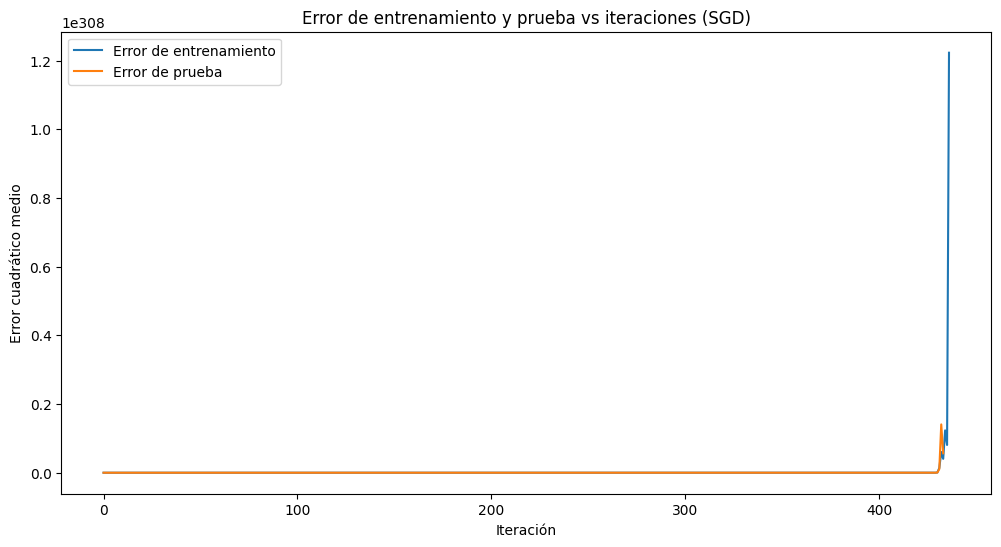

array([[nan],
       [nan]])

In [37]:
stochastic_gradient_descent(X_train, y_train, X_val, y_val, lr=1, epochs=20)

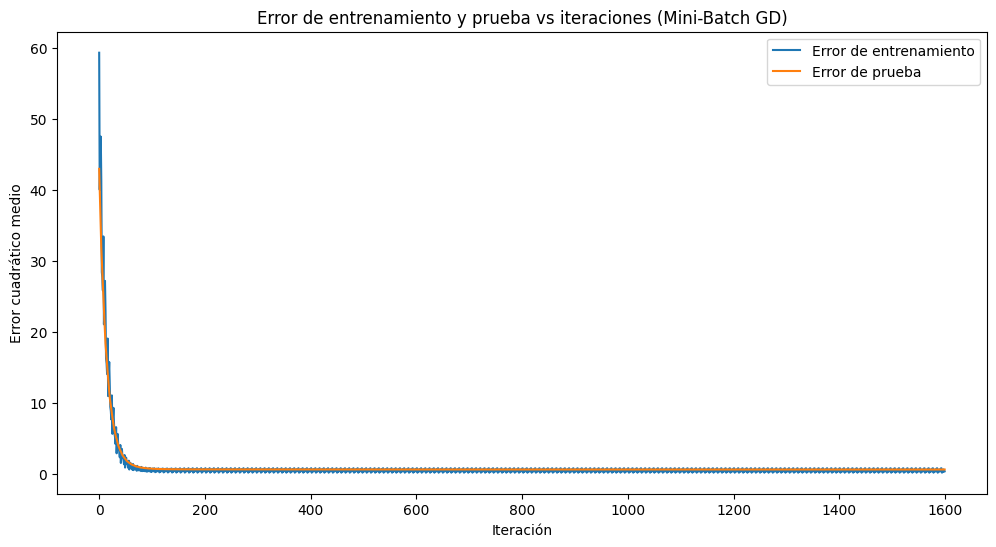

array([[3.3323149 ],
       [2.43457191]])

In [20]:
mini_batch_gradient_descent(X_train, y_train, X_test, y_test, epochs=200)

In [21]:
df = pd.read_csv('data/possum.csv')
df = df.loc[:,'sex':]
df = df[df.isna().sum(axis=1) == 0]
df1 = pd.get_dummies(data=df, columns = ['sex'], drop_first=True)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(df1.drop('totlngth', axis=1),
                                             df1['totlngth'].values.reshape(-1,1),
                                             test_size=0.2,
                                             random_state=12,
                                             )

In [23]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((80, 10), (21, 10), (80, 1), (21, 1))

[[239.89886199177843]
 [240.92569180350918]
 [268.20043297399644]
 [259.13295349994013]
 [248.4907584530498]
 [243.96737693554329]
 [248.81349107577256]
 [232.44806875711555]
 [244.29420024619316]
 [230.14163721383756]
 [247.10747645460296]
 [250.89134717633868]
 [240.13857997493938]
 [233.20464925100637]
 [245.62084122378286]
 [211.47252545098937]
 [227.98927436418273]
 [215.65434914217408]
 [229.91618543222614]
 [270.8108466604227]
 [260.7452058597532]
 [256.2795520010532]
 [229.97412989500074]
 [230.6418054903954]
 [248.07428366401788]
 [239.26834810918353]
 [248.78704755129002]
 [233.7291797785321]
 [266.5023234274119]
 [250.84098692125616]
 [250.95189530052866]
 [243.63565183137192]
 [250.2234038035155]
 [228.6348622741004]
 [267.48376119516575]
 [254.4747615197896]
 [256.4516001487994]
 [238.6351670617134]
 [251.91637885374763]
 [245.436657395885]
 [254.3504070787719]
 [250.38772490637697]
 [232.8467703657092]
 [237.95326192021395]
 [232.96121551238477]
 [257.3882893336058]
 [223

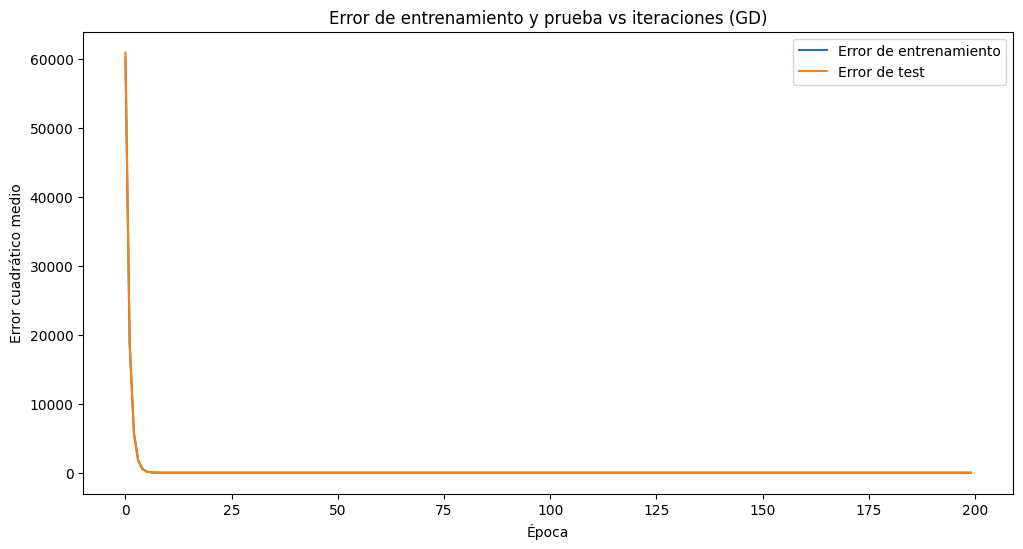

array([[-0.8955573784675429],
       [-1.0390829271435988],
       [-0.11834708147909498],
       [1.087653147306509],
       [0.3961809903676236],
       [-0.9361434547422635],
       [1.534767669185235],
       [-0.7379916547840507],
       [1.887487146569295],
       [-0.7130156697089175],
       [0.3084108283247718]], dtype=object)

In [28]:
gradient_descent(X_train, y_train, X_test, y_test, epochs=200, lr=0.00001)

In [29]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

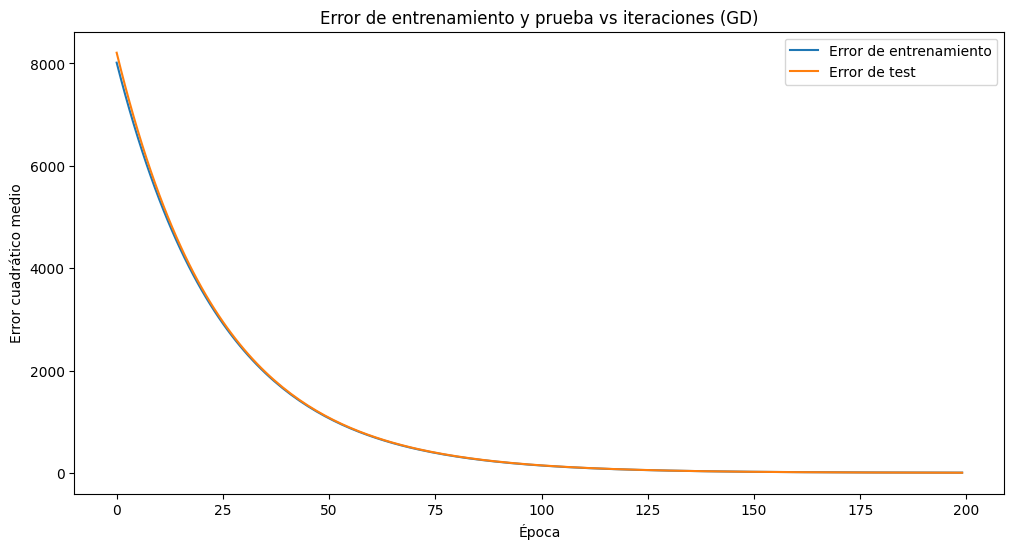

array([[ 8.55176698e+01],
       [-6.81524734e-02],
       [ 1.04404441e+00],
       [ 3.69366266e-01],
       [ 2.39997027e+00],
       [ 5.63624353e-01],
       [ 9.21428907e-01],
       [ 1.48871696e-01],
       [ 7.65998043e-01],
       [-9.80433495e-02],
       [-5.32540146e-01]])

In [34]:
gradient_descent(X_train_scaled, y_train, X_test_scaled, y_test, epochs=200, lr=0.01)

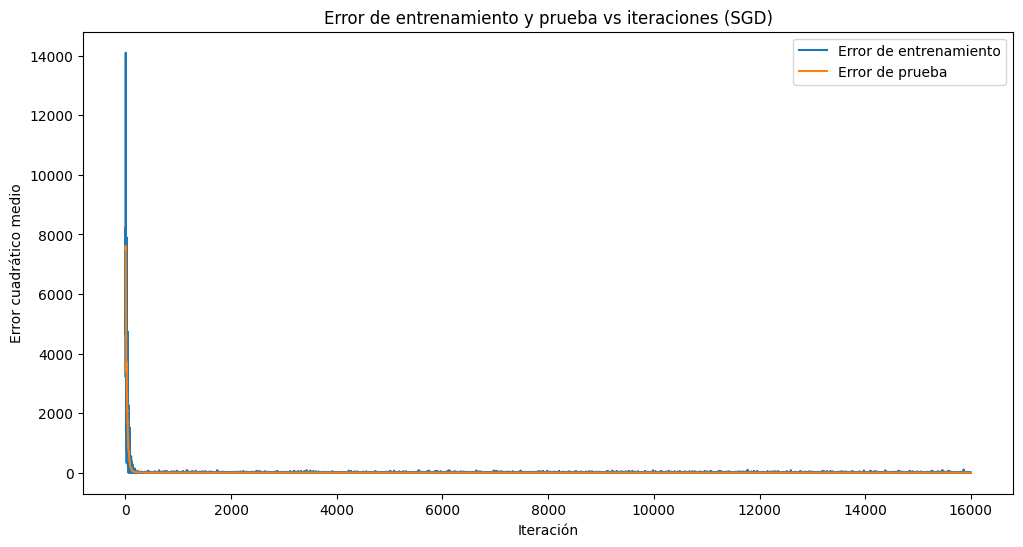

array([[ 8.70844706e+01],
       [ 2.10749946e-01],
       [ 1.78214883e+00],
       [-2.42344911e-01],
       [ 2.11300299e+00],
       [ 9.62330097e-01],
       [ 7.35373947e-01],
       [-5.10661166e-02],
       [ 3.79155401e-01],
       [-1.03549934e-01],
       [-7.64101107e-01]])

In [35]:
stochastic_gradient_descent(X_train_scaled, y_train, X_test_scaled, y_test, epochs=200, lr=0.01)

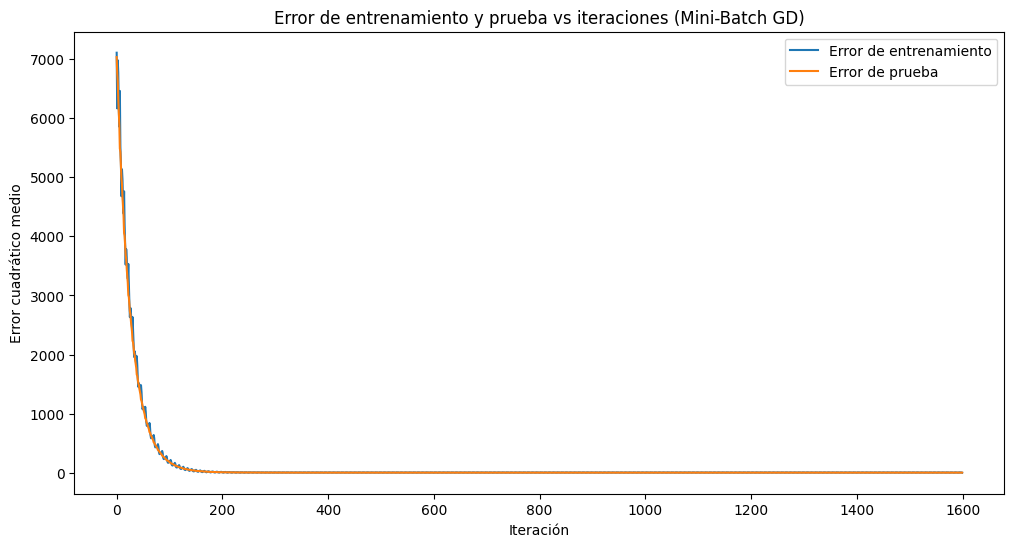

array([[ 8.71147316e+01],
       [-8.10617297e-02],
       [ 1.66115347e+00],
       [ 7.08314517e-02],
       [ 2.17798179e+00],
       [ 1.10335848e+00],
       [ 3.36557139e-01],
       [ 3.73880692e-02],
       [ 3.22715776e-01],
       [-9.24930018e-02],
       [-7.25605005e-01]])

In [36]:
mini_batch_gradient_descent(X_train_scaled, y_train, X_test_scaled, y_test, epochs=200, lr=0.01)